<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/Assignment/Assignment8/assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://github.com/aymuos/masters-practise-repo/blob/main/TERM2/ML_Lab/Assignment/Assignment8/image.png?raw=1)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Given data

X= np.array([[0,0],[0,1],[1,0],[1,1]])
y= np.array([0,0,0,1])

#Initialing weights and bias to zero

w= np.zeros(X.shape[1])
b=0.0


In [15]:
class Perceptron:
    def __init__(self, learning_rate=1.0, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for epoch in range(1, self.n_iters + 1):
            errors = 0
            print(f"\nEpoch {epoch}")
            for idx, x_i in enumerate(X):
                y_pred = self._predict_single(x_i)
                update = self.lr * (y[idx] - y_pred)
                if update != 0:
                    print(f" Before update: w={self.w}, b={self.b}")
                    self.w += update * x_i
                    self.b += update
                    print(f" After update:  w={self.w}, b={self.b}")
                    errors += 1
                else:
                    print(f" No update needed for sample {x_i}")
            if errors == 0:
                print(f"\nTraining converged at epoch {epoch} (Zero mistakes)")
                print(f"Weights: {self.w}, Bias: {self.b}")
                break

    def _predict_single(self, x):
        linear_output = np.dot(x, self.w) + self.b
        return 1 if linear_output >= 0 else 0


# Initialize and train perceptron
perceptron = Perceptron(learning_rate=1.0, n_iters=10)
perceptron.fit(X, y)

# Output final results
print("\nFinal Results:")
print("Final Weights (w):", perceptron.w)
print("Final Bias (b):", perceptron.b)
print(f"The decision boundary is: {perceptron.w[0]:.2f} * x1 + {perceptron.w[1]:.2f} * x2 + {perceptron.b:.2f} = 0")



Epoch 1
 Before update: w=[0. 0.], b=0
 After update:  w=[0. 0.], b=-1.0
 No update needed for sample [0 1]
 No update needed for sample [1 0]
 Before update: w=[0. 0.], b=-1.0
 After update:  w=[1. 1.], b=0.0

Epoch 2
 Before update: w=[1. 1.], b=0.0
 After update:  w=[1. 1.], b=-1.0
 Before update: w=[1. 1.], b=-1.0
 After update:  w=[1. 0.], b=-2.0
 No update needed for sample [1 0]
 Before update: w=[1. 0.], b=-2.0
 After update:  w=[2. 1.], b=-1.0

Epoch 3
 No update needed for sample [0 0]
 Before update: w=[2. 1.], b=-1.0
 After update:  w=[2. 0.], b=-2.0
 Before update: w=[2. 0.], b=-2.0
 After update:  w=[1. 0.], b=-3.0
 Before update: w=[1. 0.], b=-3.0
 After update:  w=[2. 1.], b=-2.0

Epoch 4
 No update needed for sample [0 0]
 No update needed for sample [0 1]
 Before update: w=[2. 1.], b=-2.0
 After update:  w=[1. 1.], b=-3.0
 Before update: w=[1. 1.], b=-3.0
 After update:  w=[2. 2.], b=-2.0

Epoch 5
 No update needed for sample [0 0]
 Before update: w=[2. 2.], b=-2.0
 

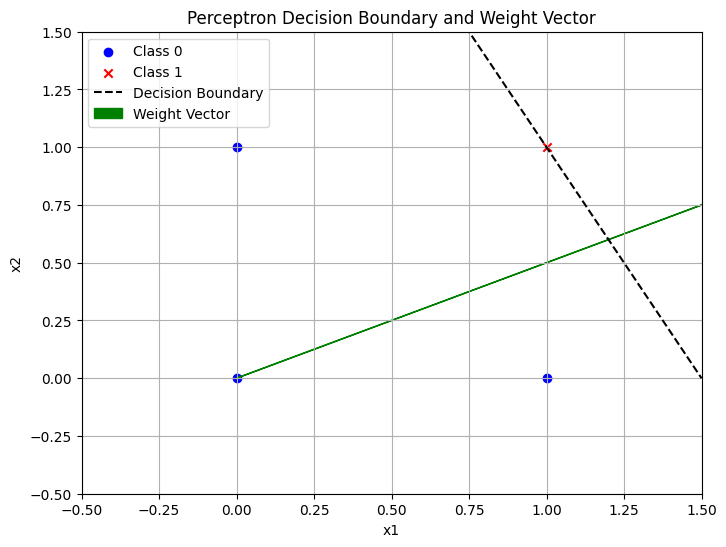

In [16]:

plt.figure(figsize=(8,6))

# Plot points with different colors
for label, marker, color in zip([0,1], ['o', 'x'], ['blue', 'red']):
    plt.scatter(X[y==label][:,0], X[y==label][:,1],
                marker=marker, color=color, label=f"Class {label}")

# Plot decision boundary: w1 * x1 + w2 * x2 + b=0
x1_vals = np.linspace(-0.5, 1.5, 100)


if perceptron.w[1] != 0:
    x2_vals = -(perceptron.w[0] * x1_vals + perceptron.b) / perceptron.w[1]
    plt.plot(x1_vals, x2_vals, 'k--', label="Decision Boundary")
else:


    # vertical line
    x_val = -perceptron.b / perceptron.w[0]
    plt.axvline(x=x_val, color='k', linestyle='--', label="Decision Boundary")

# weight vector
plt.arrow(0, 0, perceptron.w[0], perceptron.w[1],
          head_width=0.05, head_length=0.1, fc='green', ec='green', label='Weight Vector')

plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Boundary and Weight Vector')
plt.legend()
plt.grid(True)
plt.show()


Question 2 - Exploration

In [19]:
num_trials = 5
for i in range(num_trials):
    perceptron = Perceptron(learning_rate=1.0, n_iters=10)
    # Randomly shuffle the data before training
    shuffled_indices = np.random.permutation(len(X))
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    perceptron.fit(X_shuffled, y_shuffled)
    print(f"\nTrial {i + 1}: Weights: {perceptron.w}, Bias: {perceptron.b}")


Epoch 1
 Before update: w=[0. 0.], b=0
 After update:  w=[0. 0.], b=-1.0
 Before update: w=[0. 0.], b=-1.0
 After update:  w=[1. 1.], b=0.0
 Before update: w=[1. 1.], b=0.0
 After update:  w=[1. 0.], b=-1.0
 Before update: w=[1. 0.], b=-1.0
 After update:  w=[0. 0.], b=-2.0

Epoch 2
 No update needed for sample [0 0]
 Before update: w=[0. 0.], b=-2.0
 After update:  w=[1. 1.], b=-1.0
 Before update: w=[1. 1.], b=-1.0
 After update:  w=[1. 0.], b=-2.0
 No update needed for sample [1 0]

Epoch 3
 No update needed for sample [0 0]
 Before update: w=[1. 0.], b=-2.0
 After update:  w=[2. 1.], b=-1.0
 Before update: w=[2. 1.], b=-1.0
 After update:  w=[2. 0.], b=-2.0
 Before update: w=[2. 0.], b=-2.0
 After update:  w=[1. 0.], b=-3.0

Epoch 4
 No update needed for sample [0 0]
 Before update: w=[1. 0.], b=-3.0
 After update:  w=[2. 1.], b=-2.0
 No update needed for sample [0 1]
 Before update: w=[2. 1.], b=-2.0
 After update:  w=[1. 1.], b=-3.0

Epoch 5
 No update needed for sample [0 0]
 B

 the weights and bias values might differ across trials, demonstrating the non-uniqueness of the perceptron solution.

Problem - 3

In [17]:
import sklearn.datasets
import pandas as pd
breast_cancer = sklearn.datasets.load_breast_cancer ()
df = pd.DataFrame(breast_cancer.data , columns=breast_cancer.feature_names)
df['class'] = breast_cancer.target
# Add "class" column that stores the binary class labels